In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 252MB/s]
100% 1.06G/1.06G [00:09<00:00, 127MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
# batchnormalization data mai noise add krta hai taki overfitting se bche speed fast krta h



In [ ]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize. = 0-1 ke beach lana

def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create Cnn Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam' ,loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 66s 105ms/step - loss: 0.0747 - accuracy: 0.9725 - val_loss: 212.9061 - val_accuracy: 0.5248
Epoch 2/20
625/625 [==============================] - 64s 102ms/step - loss: 0.0642 - accuracy: 0.9765 - val_loss: 106.3312 - val_accuracy: 0.6052
Epoch 3/20
625/625 [==============================] - 67s 106ms/step - loss: 0.0542 - accuracy: 0.9821 - val_loss: 129.9151 - val_accuracy: 0.5674
Epoch 4/20
625/625 [==============================] - 66s 105ms/step - loss: 0.0554 - accuracy: 0.9810 - val_loss: 354.7833 - val_accuracy: 0.5282
Epoch 5/20
625/625 [==============================] - 83s 132ms/step - loss: 0.0477 - accuracy: 0.9837 - val_loss: 156.5360 - val_accuracy: 0.5728
Epoch 6/20
625/625 [==============================] - 78s 124ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 170.4363 - val_accuracy: 0.5736
Epoch 7/20
625/625 [==============================] - 73s 116ms/step - loss: 0.0441 - accuracy: 0.9853 - val_loss: 169

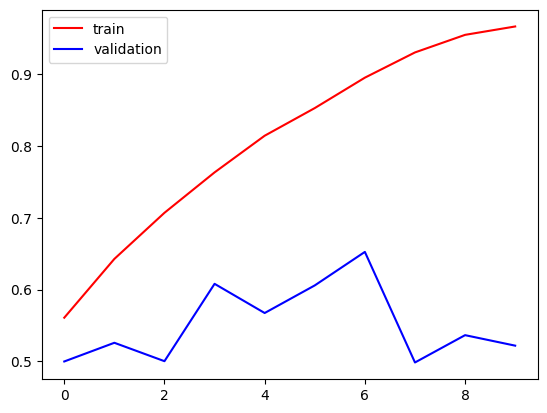

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()

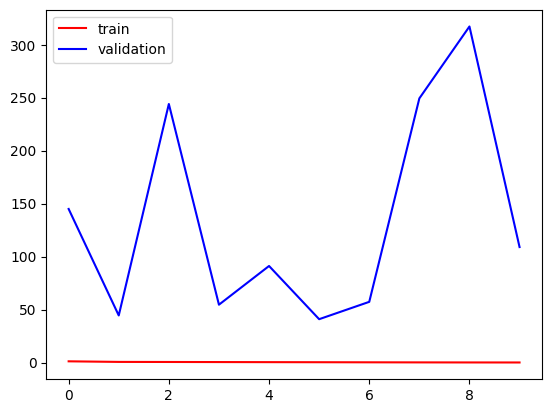

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color="blue",label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting
# add more data
# dropout
# preduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog_05.jpg')

TypeError: ignored

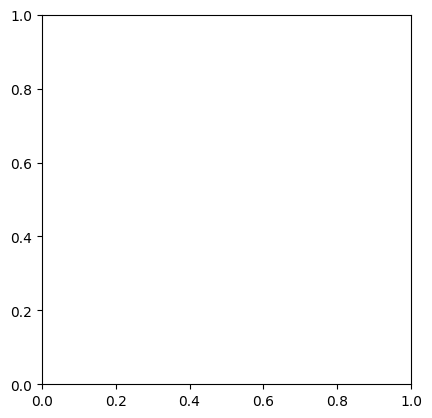

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256)) # resize the image

In [ ]:
test_input = test_img.reshape((1,256,256,3)) # reshape the image

In [ ]:
model.predict(test_input)